# Dataset Description

Problem Statement:

Source of Dataset:

Description of dataset:

Description of attributes:

# Data Wrangling, Preprocessing and Transformation

Importing DataSet (19L-1135) 

In [2]:
import pandas as pd

df = pd.read_csv("S_Data.csv")
display(df)

Year        Levels           Type            Category   Age  Marks  \
0     2021       Masters  International         Merit Based   NaN   66.0   
1     2018           PhD          Local  Merit & Need Based   NaN    NaN   
2     2022  Masters, PhD          Local  Merit & Need Based   NaN   75.0   
3     2015       Masters          Local  Merit & Need Based  33.0   66.0   
4     2021  Masters, PhD  International          Need Based   NaN   75.0   
...    ...           ...            ...                 ...   ...    ...   
5427  2020       Masters          Local         Merit Based  35.0   60.0   
5428  2020       Masters  International         Merit Based   NaN   60.0   
5429  2019       Masters          Local         Merit Based  25.0    NaN   
5430  2016  Masters, PhD  International  Merit & Need Based   NaN   75.0   
5431  2017  Masters, PhD          Local          Need Based  29.0   85.0   

      Scholarship  Family_Income Approved  
0            90.0            NaN       No  
1           100.0          150.0       No  
2           100.0          100.0      Yes  
3            80.0            NaN      Yes  
4            80.0            NaN      Yes  
...           ...            ...      ...  
5427         70.0          100.0      Yes  
5428         70.0           50.0      Yes  
5429         80.0           50.0      Yes  
5430          NaN            NaN       No  
5431         60.0          100.0       No  

[5432 rows x 9 columns]

Data Cleaning (19L-2707)

In [3]:
df = df.drop_duplicates()

In [4]:
#df.describe()
#df.info()
df.isnull().sum()

Year                0
Levels              0
Type                0
Category            0
Age              1733
Marks            1084
Scholarship      1522
Family_Income    1046
Approved            0
dtype: int64

In [5]:
df.shape

(5368, 9)

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Marks'] = df['Marks'].fillna(df['Marks'].mean())
df['Scholarship'] = df['Scholarship'].fillna(df['Scholarship'].mean())
df['Family_Income'] = df['Family_Income'].fillna(df['Family_Income'].mean())
print("Done")
#display(df)

Done


Data Tramsformation (19L-1135)

In [7]:
df.dtypes

Year               int64
Levels            object
Type              object
Category          object
Age              float64
Marks            float64
Scholarship      float64
Family_Income    float64
Approved          object
dtype: object

In [8]:
#df['deadline'] = pd.to_datetime(df['deadline'], format='%m/%d/%Y', errors='coerce')
#df['deadline'] = df['deadline'].fillna('12/30/2030')

In [9]:
from pandas.api.types import CategoricalDtype
category = ['Merit Based', 'Need Based', 'Merit & Need Based']
levels = ['PhD', 'Masters', 'Masters, PhD']

Dtype1 = CategoricalDtype(categories = category, ordered=True)
Dtype2 = CategoricalDtype(categories = levels, ordered=True)

In [10]:
df.Category = df.Category.astype(Dtype1).cat.codes

In [11]:
df.Levels = df.Levels.astype(Dtype2).cat.codes

In [12]:
df.Type = df.Type.astype('category').cat.codes

In [13]:
df.Approved = df.Approved.astype('category').cat.codes

In [14]:
df

Year  Levels  Type  Category        Age     Marks  Scholarship  \
0     2021       1     0         0  29.980743  66.00000    90.000000   
1     2018       0     1         2  29.980743  71.52521   100.000000   
2     2022       2     1         2  29.980743  75.00000   100.000000   
3     2015       1     1         2  33.000000  66.00000    80.000000   
4     2021       2     0         1  29.980743  75.00000    80.000000   
...    ...     ...   ...       ...        ...       ...          ...   
5427  2020       1     1         0  35.000000  60.00000    70.000000   
5428  2020       1     0         0  29.980743  60.00000    70.000000   
5429  2019       1     1         0  25.000000  71.52521    80.000000   
5430  2016       2     0         2  29.980743  75.00000    80.192408   
5431  2017       2     1         1  29.000000  85.00000    60.000000   

      Family_Income  Approved  
0        125.728829         0  
1        150.000000         0  
2        100.000000         1  
3        125.728829         1  
4        125.728829         1  
...             ...       ...  
5427     100.000000         1  
5428      50.000000         1  
5429      50.000000         1  
5430     125.728829         0  
5431     100.000000         0  

[5368 rows x 9 columns]

Data Visualization (19L-2702)

In [15]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Type Analysis'}>

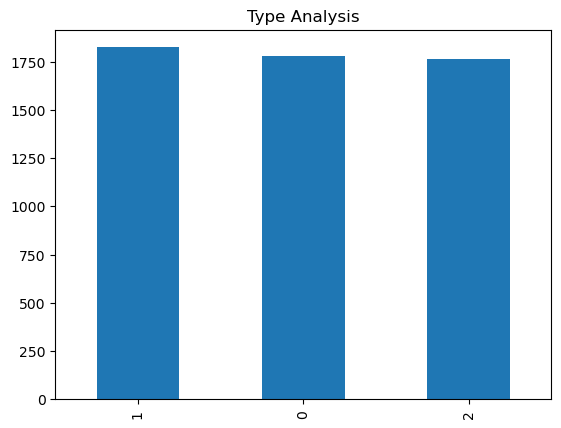

In [16]:
df.Levels.value_counts().plot.bar(title="Type Analysis")

<AxesSubplot:ylabel='Type'>

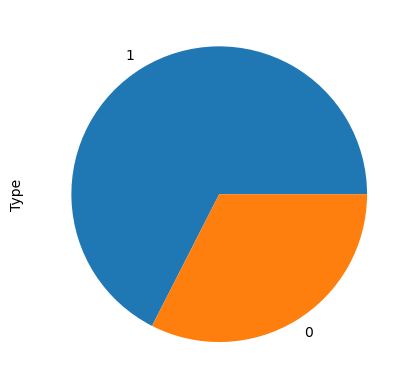

In [17]:
df.Type.value_counts().plot.pie()

Data Normalization & Standardization (19L-2707)


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [19]:
n_df = MinMaxScaler().fit_transform(df[df.columns[1:6]])

In [20]:
n_df = pd.DataFrame(n_df, columns = df.columns[1:6])

In [21]:
n_df

Levels  Type  Category       Age     Marks
0        0.5   0.0       0.0  0.498074  0.240000
1        0.0   1.0       1.0  0.498074  0.461008
2        1.0   1.0       1.0  0.498074  0.600000
3        0.5   1.0       1.0  0.800000  0.240000
4        1.0   0.0       0.5  0.498074  0.600000
...      ...   ...       ...       ...       ...
5363     0.5   1.0       0.0  1.000000  0.000000
5364     0.5   0.0       0.0  0.498074  0.000000
5365     0.5   1.0       0.0  0.000000  0.461008
5366     1.0   0.0       1.0  0.498074  0.600000
5367     1.0   1.0       0.5  0.400000  1.000000

[5368 rows x 5 columns]

<AxesSubplot:title={'center':'Distribution'}, ylabel='Frequency'>

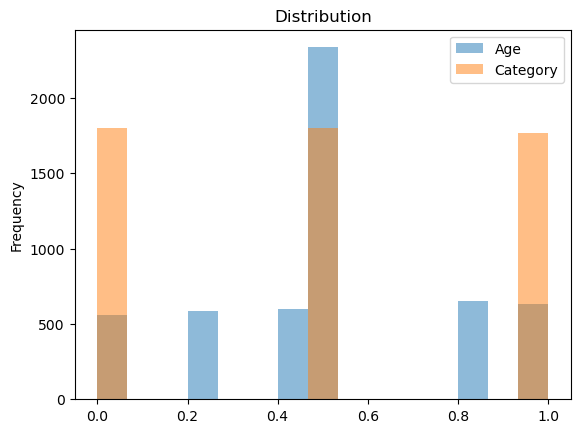

In [22]:
n_df[['Age','Category']].plot.hist(alpha=0.5,bins=15,title="Distribution")

In [24]:
#s_df = StandardScaler().fit_transform(df[df.columns[1:6]])

In [25]:
#s_df = pd.DataFrame(s_df, columns = df.columns[1:6])

In [26]:
#s_df

Data Dimensionality Reduction (19L-1135)

In [27]:
from sklearn.decomposition import PCA

In [28]:
n_df.cov()

Levels      Type  Category       Age     Marks
Levels    0.165079 -0.000978  0.000599  0.000691 -0.001110
Type     -0.000978  0.219442  0.000990 -0.003004 -0.002605
Category  0.000599  0.000990  0.166144 -0.001339 -0.003017
Age       0.000691 -0.003004 -0.001339  0.077449  0.000173
Marks    -0.001110 -0.002605 -0.003017  0.000173  0.111505

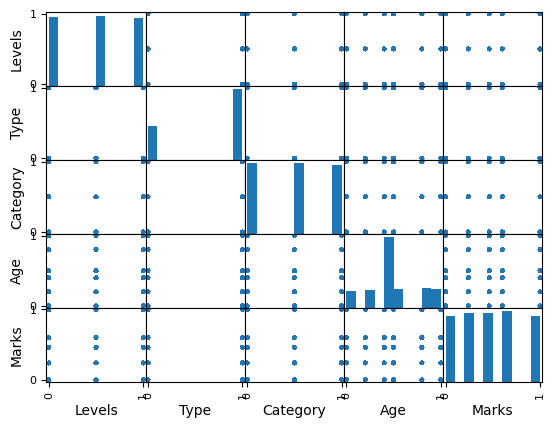

In [29]:
pd.plotting.scatter_matrix(n_df)
plt.show()

In [30]:
pca_df = PCA(n_components = 2)

In [31]:
pca_df = pca_df.fit_transform(n_df)

In [32]:
n_df.shape

(5368, 5)

In [33]:
pca_df.shape

(5368, 2)

Text(0, 0.5, 'Second Principle Component')

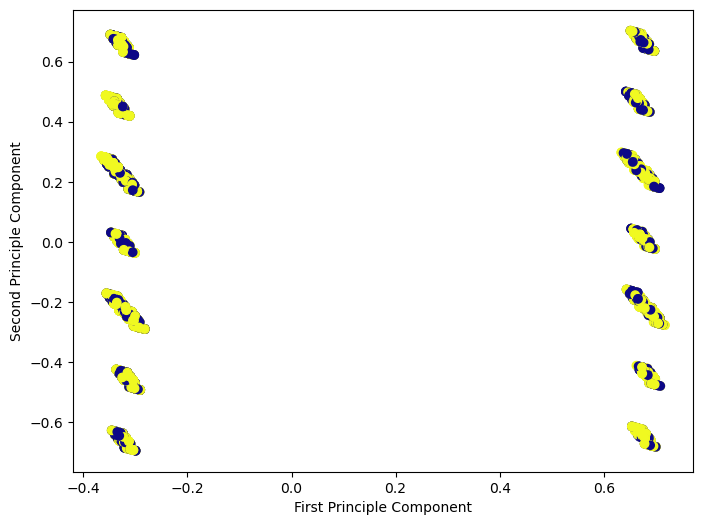

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df[:,0],pca_df[:,1], c=df['Approved'], cmap='plasma' )
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

Data Validation (19L-2707)


In [379]:
from sklearn.model_selection import train_test_split